In [1]:
%cd ..

D:\ryanh\github\cell_assembly_replay


In [29]:
import pandas as pd
from cell_assembly_replay import functions
import os
import numpy as np
import matplotlib.pyplot as plt

In [58]:
data_path = r'F:\Projects\PAE_PlaceCell\ProcessedData'
analysis_path = r'F:\Projects\PAE_PlaceCell\analysis\behavior'
# df = pd.read_csv(r'F:\Projects\PAE_PlaceCell\analysis\session_df.csv')
df_swr = pd.read_csv('F:/Projects/PAE_PlaceCell/analysis/swr_data/post_processed/swr_df.csv')

## only keep HPC

In [60]:
df_swr = df_swr[(df_swr.area == 'ca1') | (df_swr.area == 'ca3')]

## only keep unique combo of session and area

In [61]:
df_swr = df_swr.drop_duplicates(subset = ["session","area"])
# df_swr[df_swr.rat == 'LEM3124']

In [63]:
possible_ripple_time = []
possible_ripple_epochs = []

speed_threshold = 4 #cm/sec
fs = 30
    
for session in df_swr.session:
    df_pos = functions.load_position(os.path.join(data_path,session)+'.mat')
    
    # pull out speed
    speed = df_pos.speed
    # nans are 0cm/sec to account for non-tracked pedestal epochs
    speed[np.isnan(speed)] = 0
    # total amount of time (sec) in which a ripple may have occured
    possible_ripple_time.append(np.sum(speed <= speed_threshold)/fs)
    # number of instances in which a ripple could have occured
    # Here this value is simply represented by the sum of the index 
    # as the min ripple epoch allowable was 15ms and the min ripple duration 
    # in the data set was around 23ms. That said, a single ripple could possible occur
    # within each valid frame under the speed threshold.
    possible_ripple_epochs.append(np.sum(speed <= speed_threshold))


In [65]:
df_swr['possible_ripple_time'] = possible_ripple_time
df_swr['possible_ripple_epochs'] = possible_ripple_epochs

In [67]:
df_swr.to_csv(os.path.join(analysis_path,'df.csv'))


In [70]:
df_swr[df_swr.group == 'control'].possible_ripple_time

0        1511.466667
11       1793.400000
51        405.900000
58       1925.466667
89       3484.700000
            ...     
18152     447.233333
18155     396.466667
18157     428.466667
18160     328.566667
18161     597.900000
Name: possible_ripple_time, Length: 80, dtype: float64

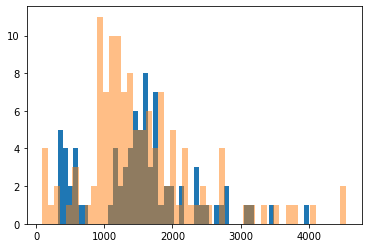

In [74]:
plt.figure()
plt.hist(df_swr[df_swr.group == 'control'].possible_ripple_time,50)
plt.hist(df_swr[df_swr.group == 'pae'].possible_ripple_time,50,alpha=.5)

plt.show()
